# AMES_Housing_ML_DecisionTree

### Table of Contents

1)Load AMES_Housing dataset
2)Data retrieval
3)Handling Missing Values
4)Analyse and handle features
    *Numeric Features
    *Categorical Features
5)Decision Tree Classification
    *With and Without Scaling
    *Hyperparameter Tuning
6)SVM
    *Hyperparameter Tuning SVM
7)Random Forest Regressor
    *Hyperparameter Tuning
8)KNN
    *Hyperparameter Tuning KNN
9)Analysis of the results and finalizing best model    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import seaborn as sns

### Load the dataset

In [2]:
    df_train=pd.read_csv(r"C:\Users\harsh\Python Practice\house-prices-advanced-regression-techniques\train.csv")
    df_test=pd.read_csv(r"C:\Users\harsh\Python Practice\house-prices-advanced-regression-techniques\test.csv")
    pd.pandas.set_option('display.max_columns',None)
    pd.pandas.set_option('display.max_rows',None)

In [3]:
print("Train data shape:",df_train.shape)
print("Test data shape:",df_test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Looking at data description – list columns which are not really relevant for the business.

MSSubClass, LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, GarageYrBlt, WoodDeckSF, EnclosedPorch, 3SsnPorch, ScreenPorch,PoolArea. 

In [5]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: >

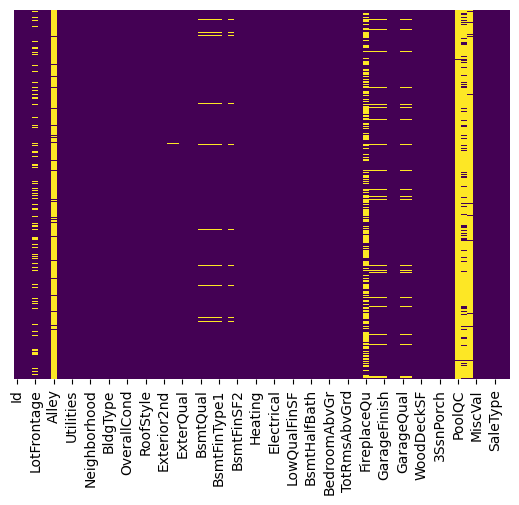

In [6]:
#From the null values data, we see LotFrontage, Alley,PoolQC, Fence, MiscFeature,FirePlaceQu has most number of null values and needs to be handled.
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### The above heatmap clearly represent the null values in each feature. LotFrontage, Alley, FireplaceQu, PoolQC, Fence, MiscFeature has majority of null values. With further validation these features can be dropped.                              

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling Missing Values
1)Drop the columns with more than 70% null values.
2)Numerical features with null values are filled with mean.
3)Categorical feature with null values are filled with mode.

In [9]:
## lets create a functions that can be used for any future data
def percent_missing_data(df):
    missing_count = df.isna().sum().sort_values(ascending = False)
    missing_percent = 100 * df.isna().sum().sort_values(ascending = False) / len(df)
    missing_count = pd.DataFrame(missing_count[missing_count > 0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent > 0])
    missing_table = pd.concat([missing_count,missing_percent], axis = 1)
    missing_table.columns = ["missing_count", "missing_percent"]
    
    return missing_table

In [10]:
#Display each features with missing count and respective percentages.
percent_nan = percent_missing_data(df_train)
percent_nan

missing_count  missing_percent
PoolQC                 1453        99.520548
MiscFeature            1406        96.301370
Alley                  1369        93.767123
Fence                  1179        80.753425
FireplaceQu             690        47.260274
LotFrontage             259        17.739726
GarageYrBlt              81         5.547945
GarageCond               81         5.547945
GarageType               81         5.547945
GarageFinish             81         5.547945
GarageQual               81         5.547945
BsmtFinType2             38         2.602740
BsmtExposure             38         2.602740
BsmtQual                 37         2.534247
BsmtCond                 37         2.534247
BsmtFinType1             37         2.534247
MasVnrArea                8         0.547945
MasVnrType                8         0.547945
Electrical                1         0.068493

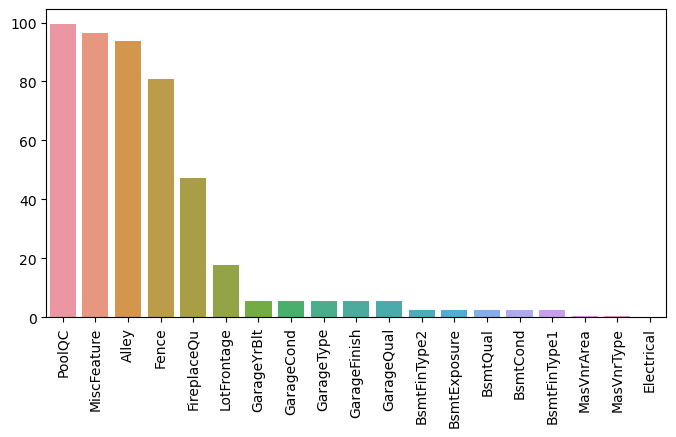

In [11]:
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:,1])
plt.xticks(rotation = 90)
plt.show()

In [12]:
index = percent_nan[percent_nan["missing_percent"] >70].index

for name in index:
    df_train.drop(name, axis=1,inplace=True)
print("Dropped Features in train data with >70% missing values:",index)

Dropped Features in train data with >70% missing values: Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')


In [ ]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [ ]:
MissingCat_Features=['BsmtQual','BsmtCond','BsmtExposure','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType','MasVnrArea','GarageYrBlt']
for feature in MissingCat_Features:
    df_train[feature]=df_train[feature].fillna(df_train[feature].mode()[0])

In [ ]:
percent_nan = percent_missing_data(df_train)
percent_nan

# Filling NA values

Empty DataFrame
Columns: [missing_count, missing_percent]
Index: []

## Handling Numeric Features


1)Numerical features has Discrete features, continuous features, Year features
2)Check each category seperately and handle them accordingly.
3)Check for outliers, skewdness in distribution etc

In [ ]:
numerical_features=[feature for feature in final_df.columns if final_df[feature].dtypes!='O']
len(numerical_features)
year_feature=[feature for feature in final_df if 'Yr' in feature or 'Year' in feature]

final_df[numerical_features] = final_df[numerical_features].fillna(final_df[numerical_features].mean())

Discrete_feature = [feature for feature in numerical_features if len(final_df[feature].unique())<25 and feature not in year_feature+['Id'] ]
print("No of Discrete variables: {}".format(len(Discrete_feature)))

for feature in Discrete_feature:
    df_copy=final_df.copy()
    df_copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

In [20]:
final_df[numerical_features] = final_df[numerical_features].fillna(final_df[numerical_features].mean())

In [21]:
Discrete_feature = [feature for feature in numerical_features if len(final_df[feature].unique())<25 and feature not in year_feature+['Id'] ]
print("No of Discrete variables: {}".format(len(Discrete_feature)))

No of Discrete variables: 17


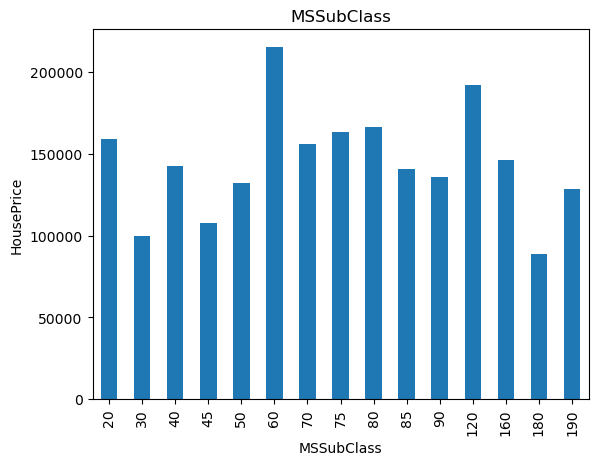

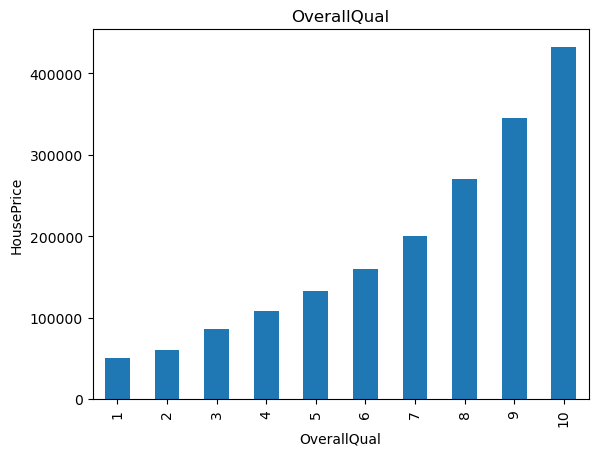

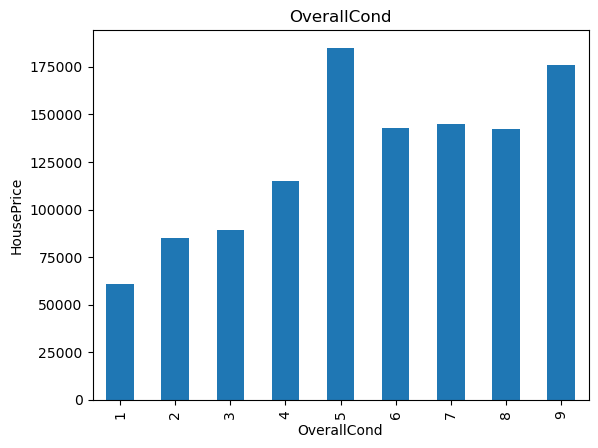

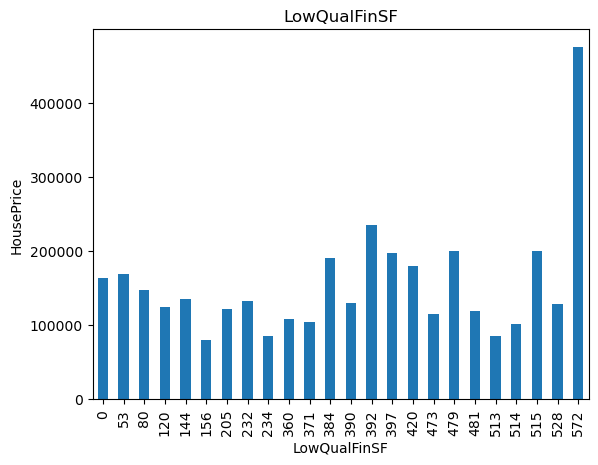

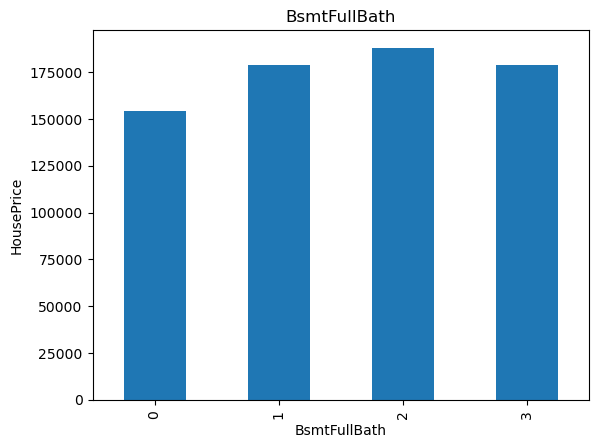

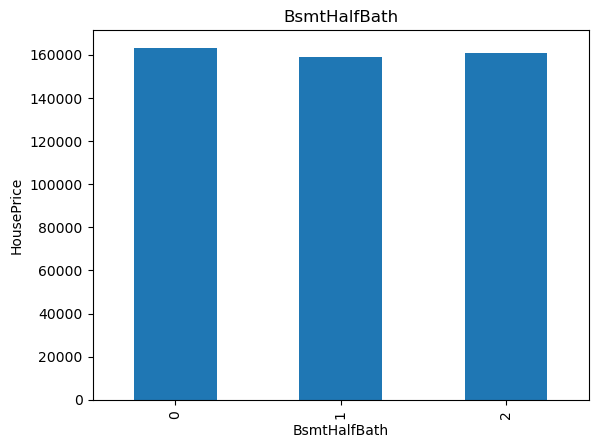

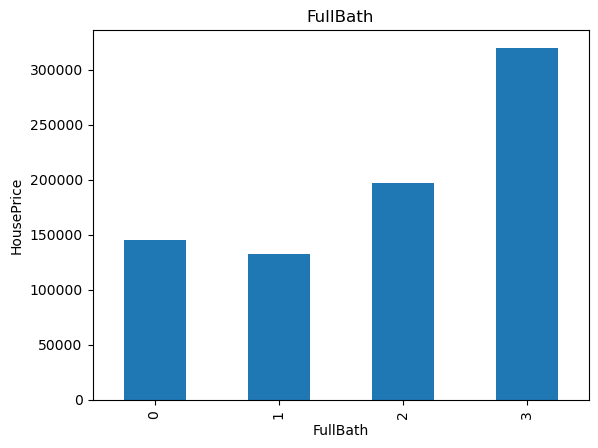

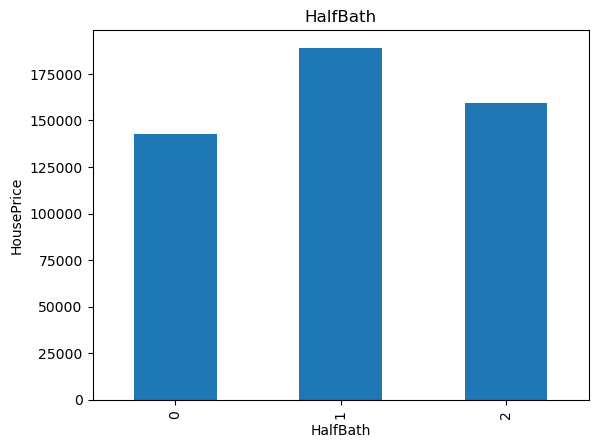

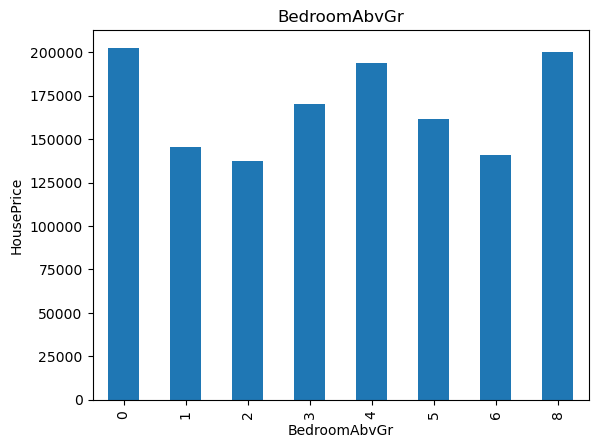

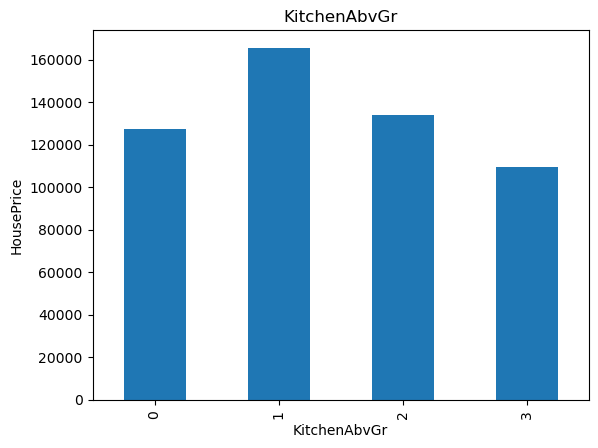

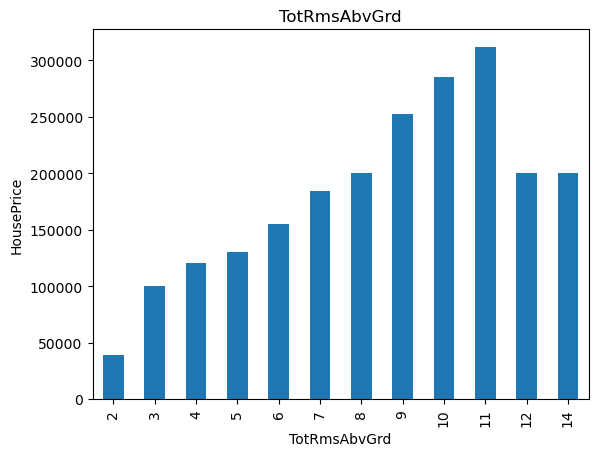

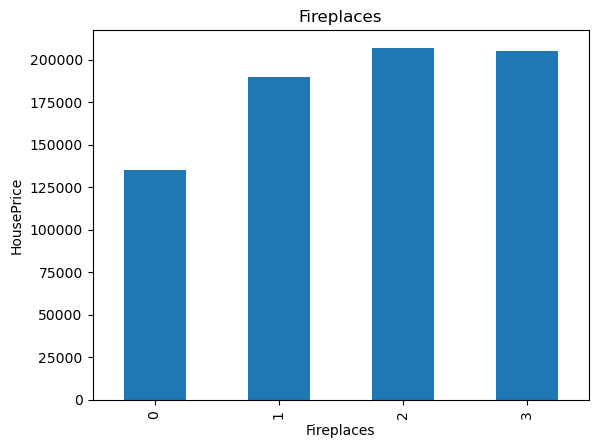

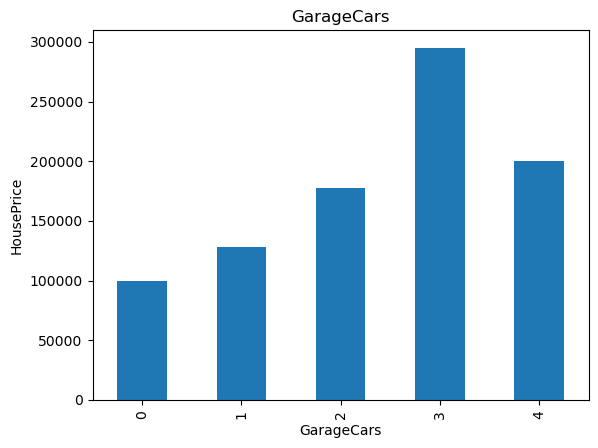

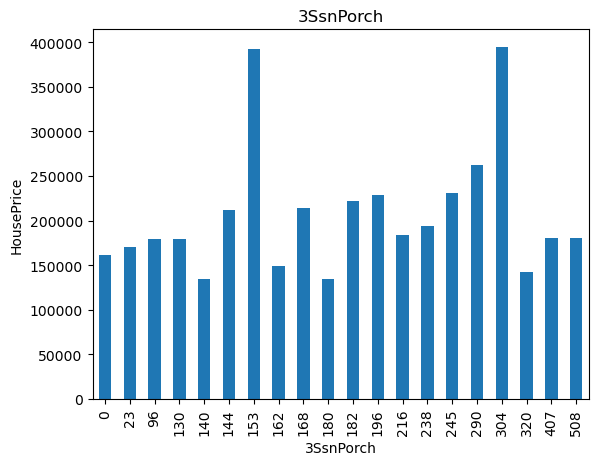

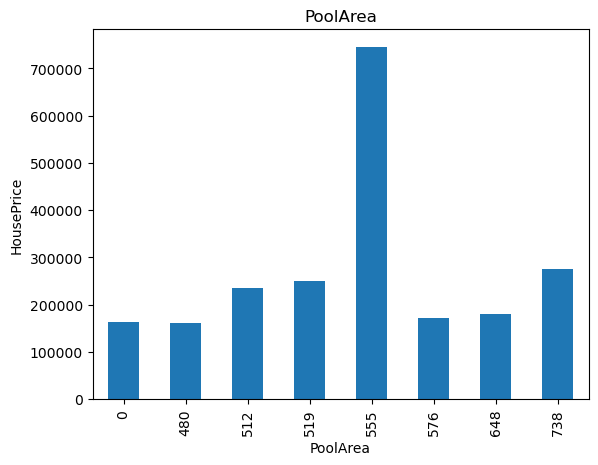

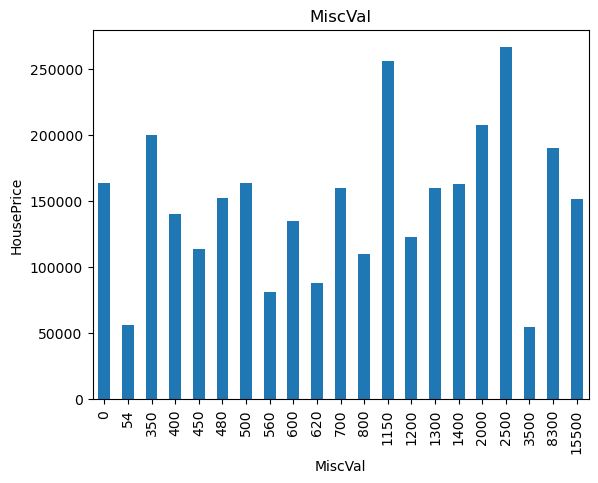

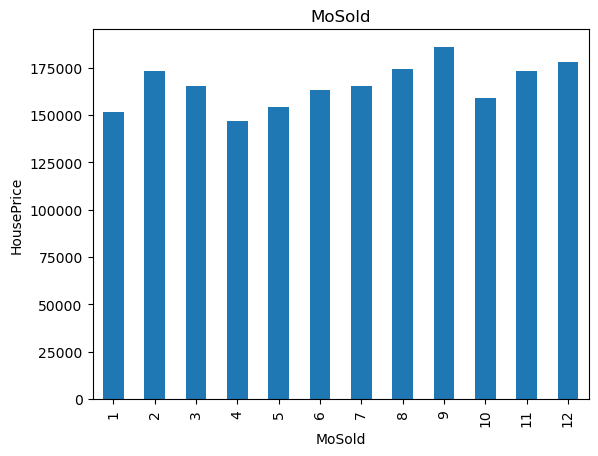

In [22]:
for feature in Discrete_feature:
    df_copy=final_df.copy()
    df_copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

In [23]:
#There is significant relation between discrete variables and Sales Price
#Continuous Numeric Variables
cont_features=[feature for feature in numerical_features if feature not in Discrete_feature+year_feature+['Id']]
print("No of Continuous Variables: {}".format(len(cont_features)))

No of Continuous Variables: 16


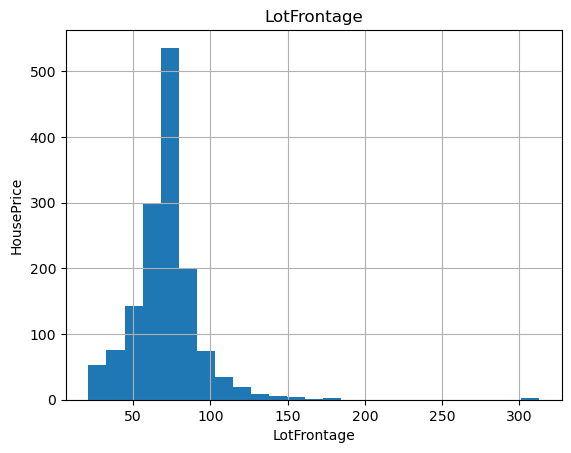

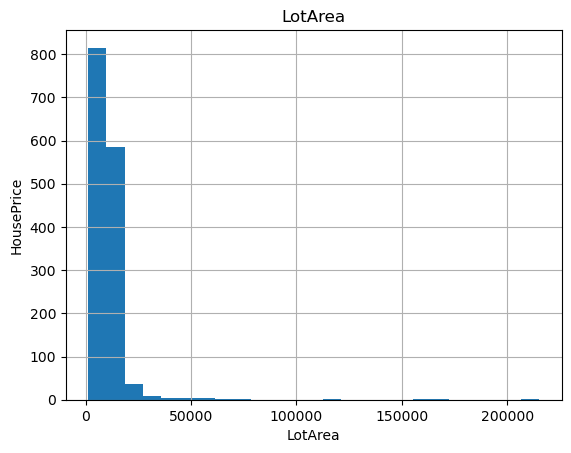

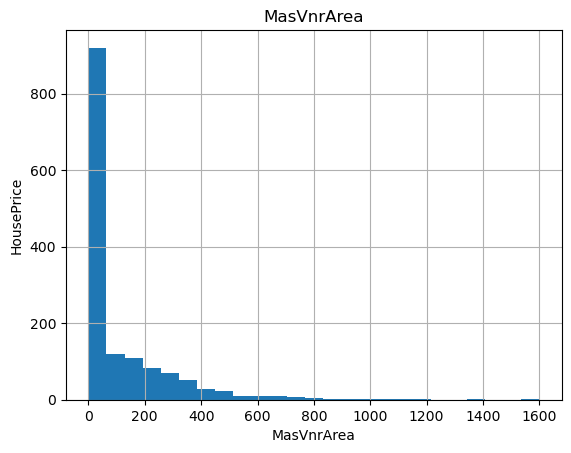

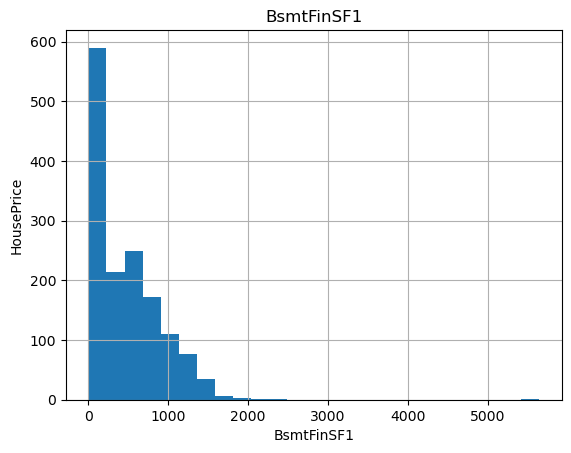

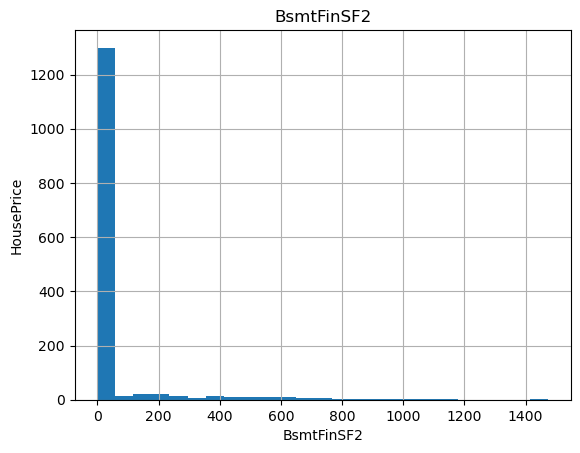

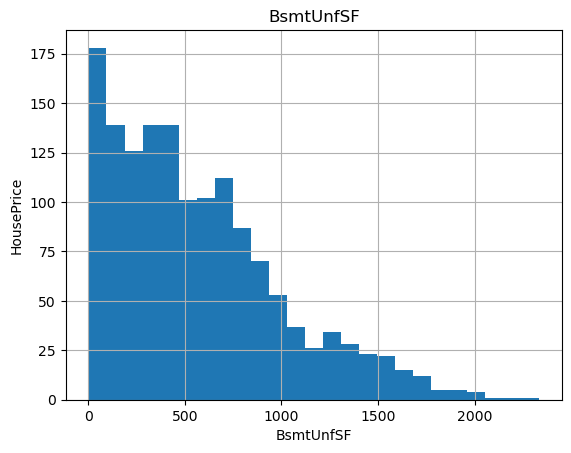

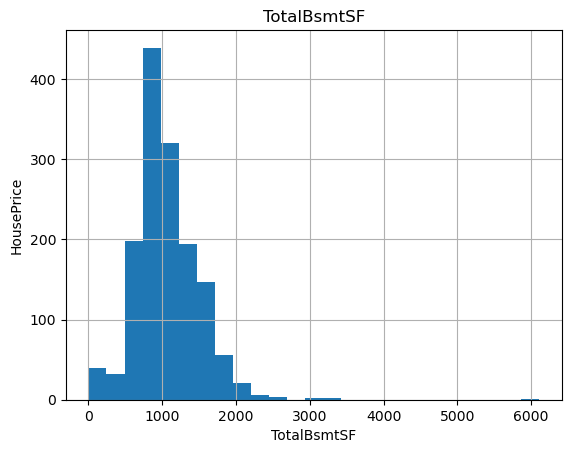

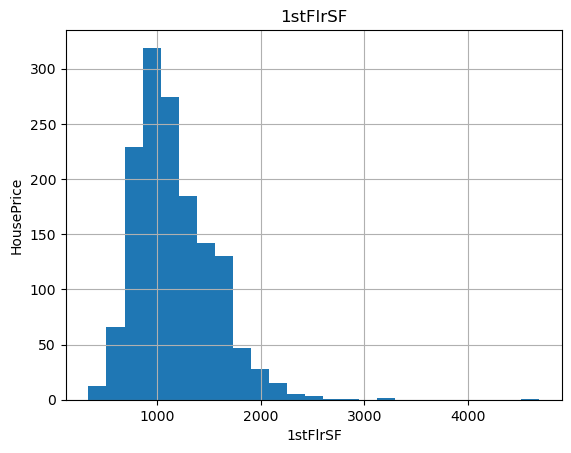

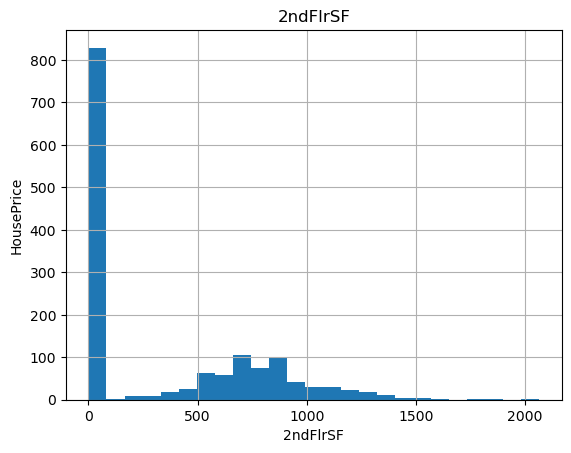

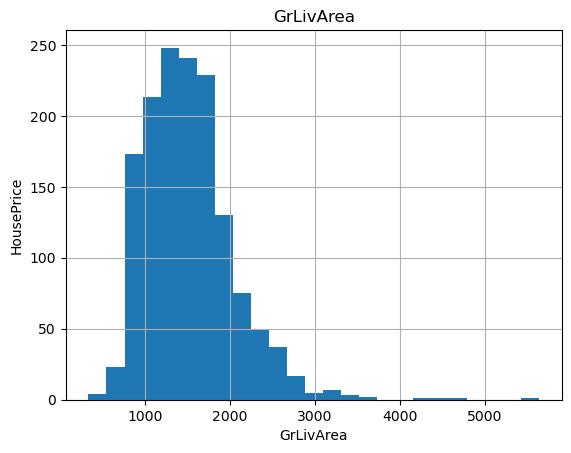

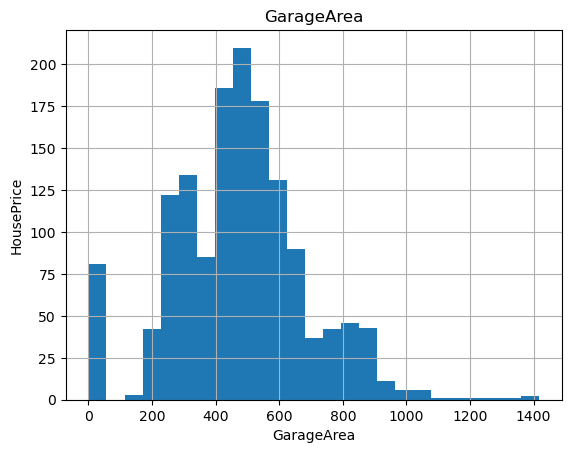

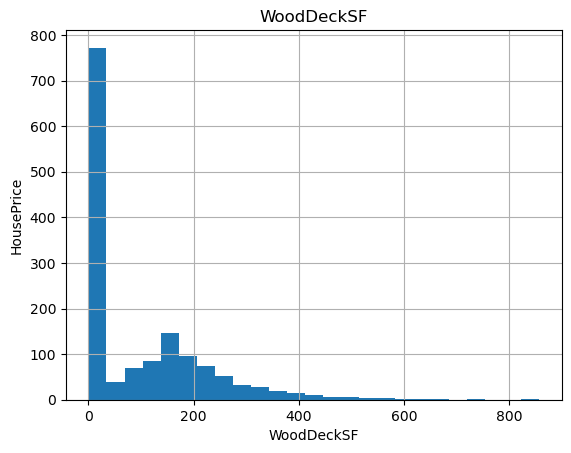

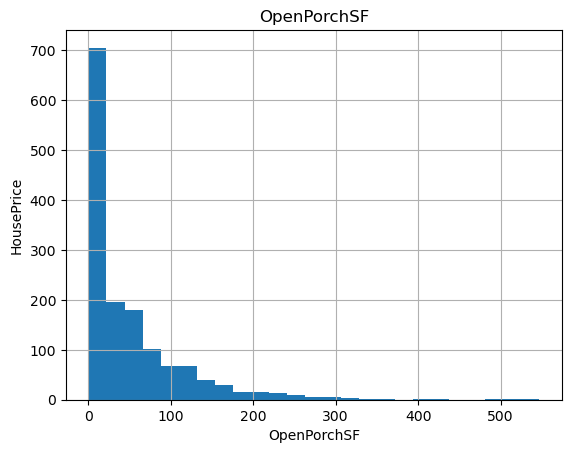

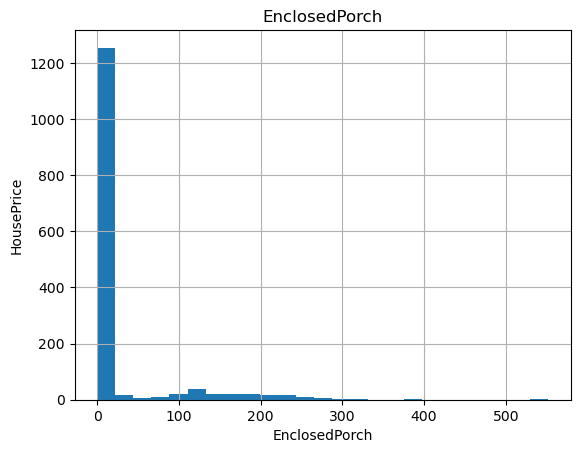

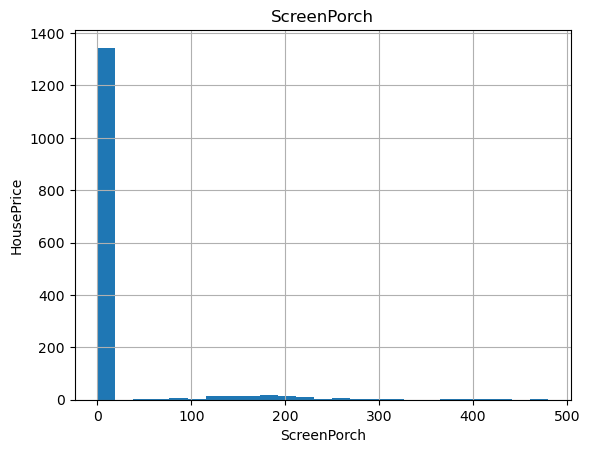

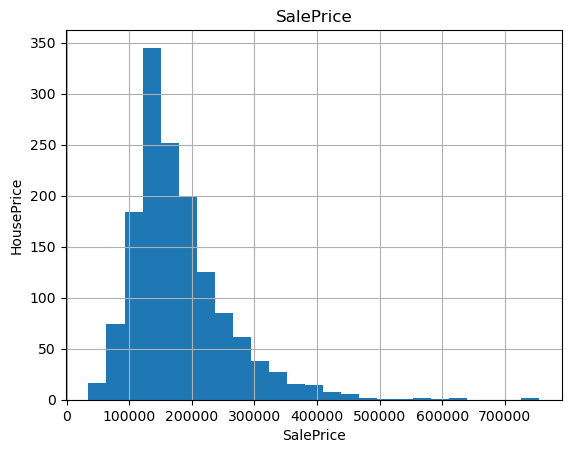

In [24]:
for feature in cont_features:
    df_copy=final_df.copy()
    df_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

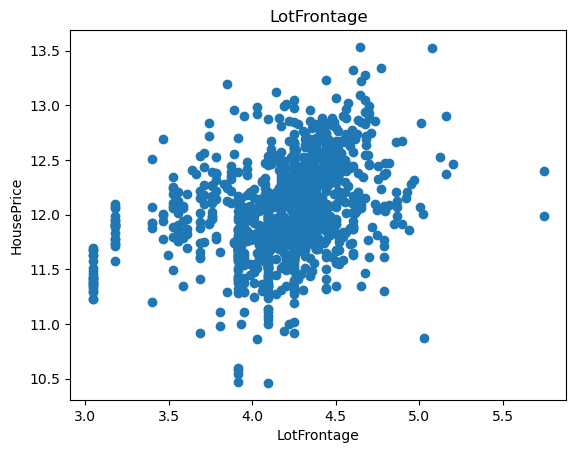

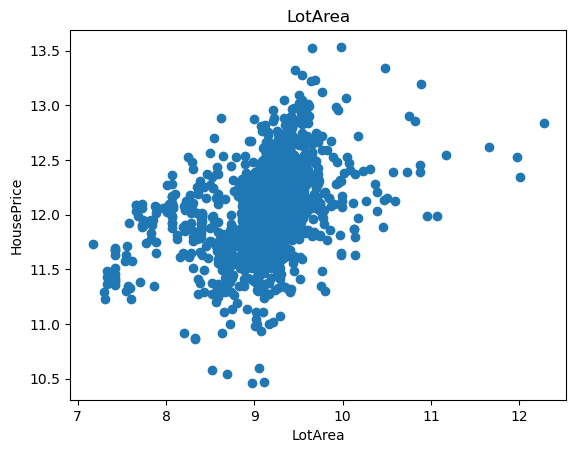

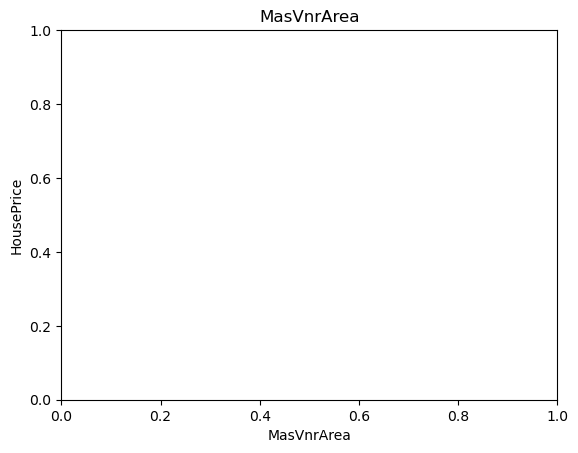

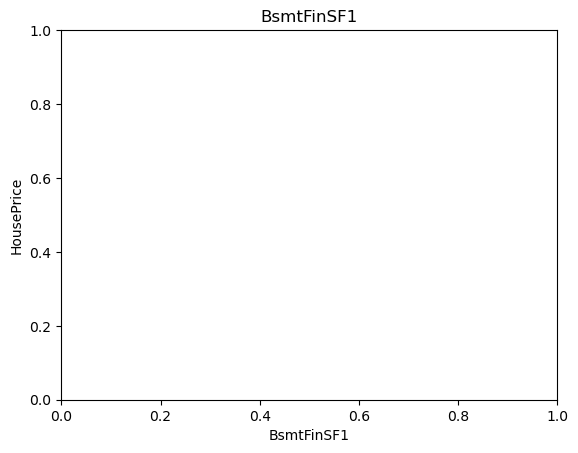

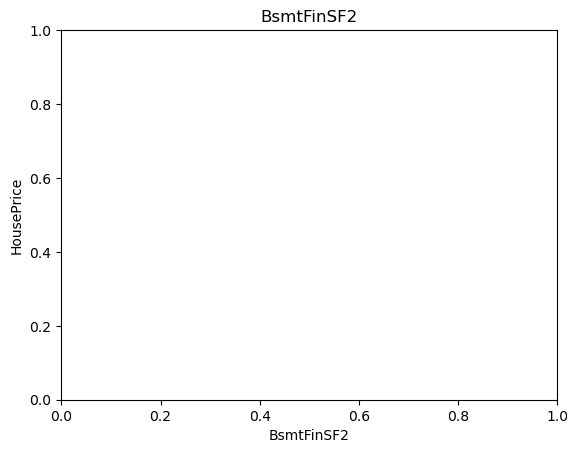

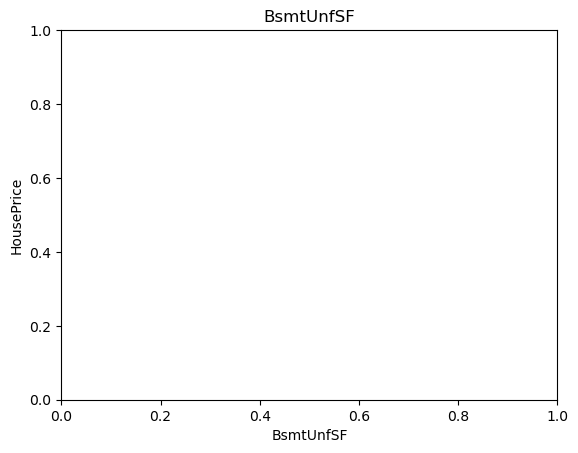

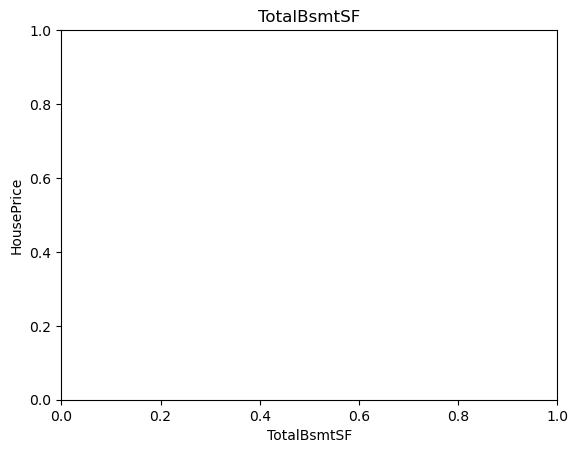

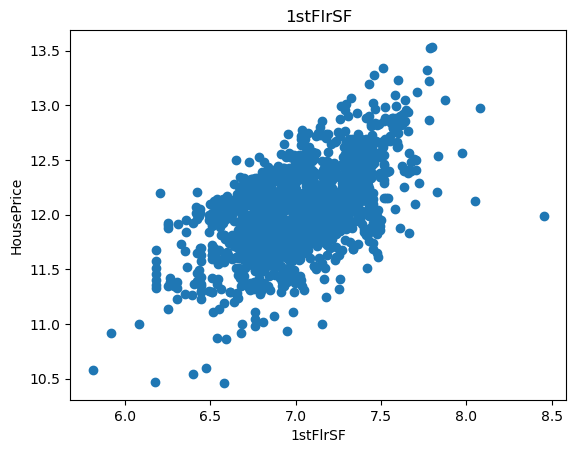

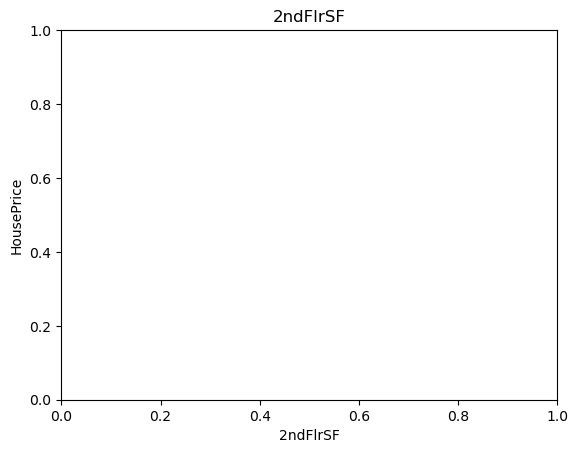

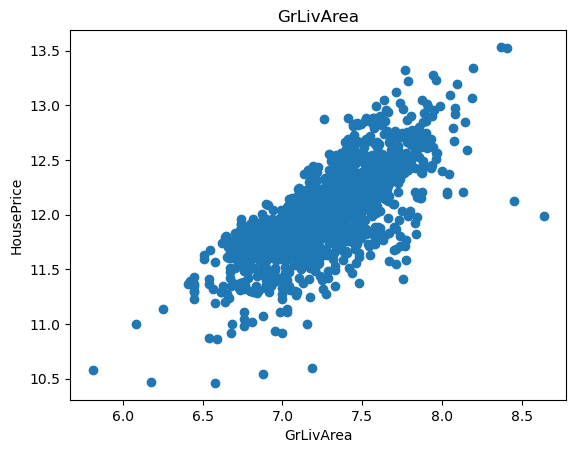

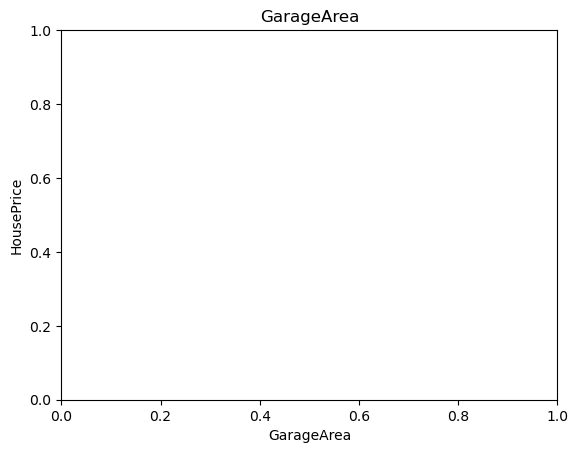

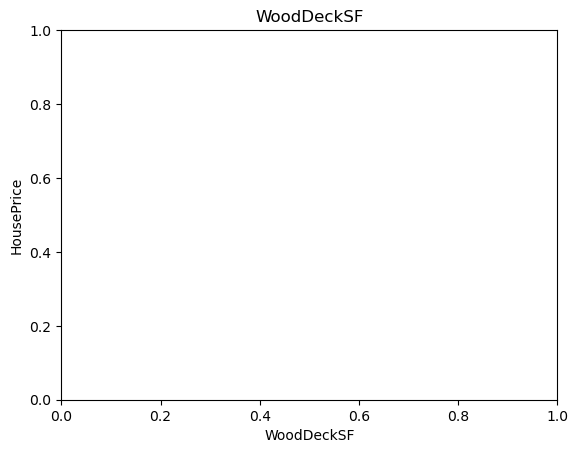

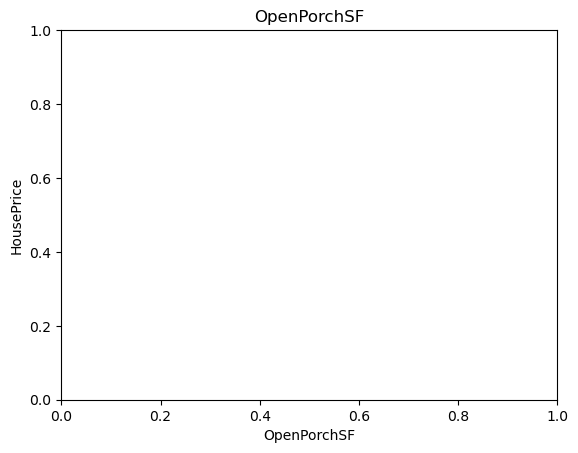

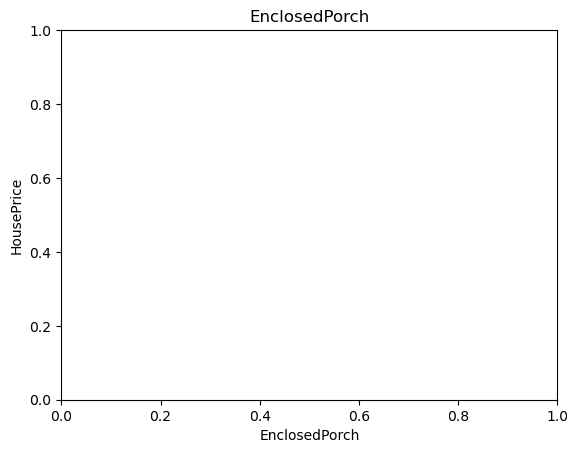

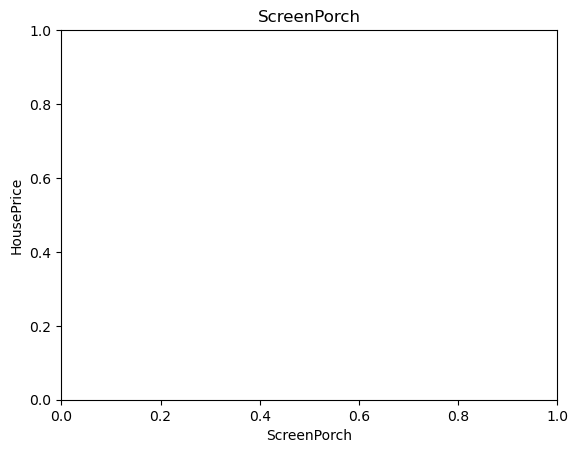

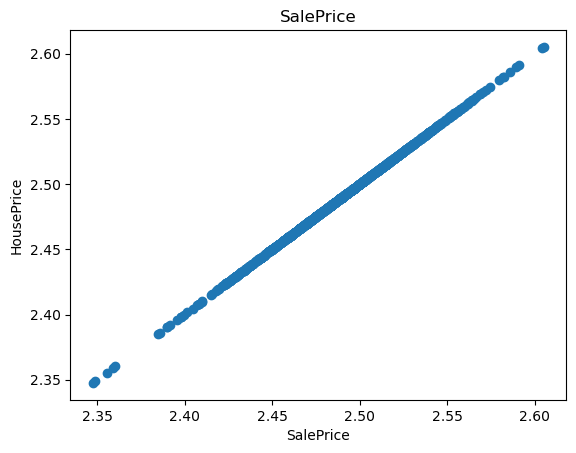

In [25]:
#The above plots shows only few Gaussian distribution rest all are skewed.to convert the skewed ones to normal dist we implement Logarithmic Transformation
for feature in cont_features:
    df_copy=df_train.copy()
    if 0 in df_copy[feature].unique():
        pass
    else:
        df_copy[feature]=np.log(df_copy[feature])
        df_copy['SalePrice']=np.log(df_copy['SalePrice'])
        plt.scatter(df_copy[feature],df_copy['SalePrice'])
        
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()
    final_df['SalePrice']=df_train['SalePrice'].copy()


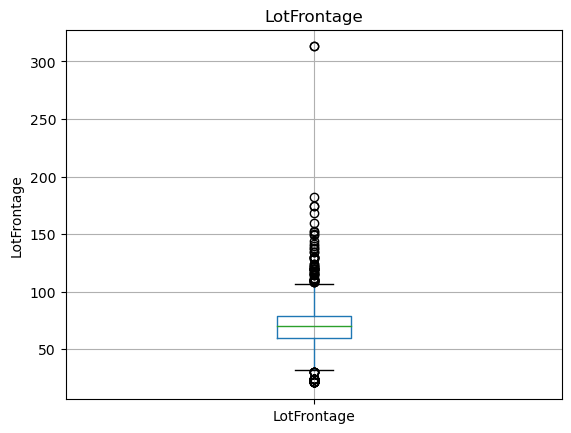

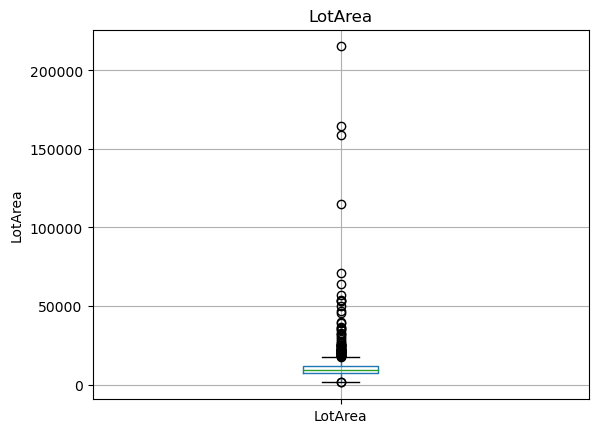

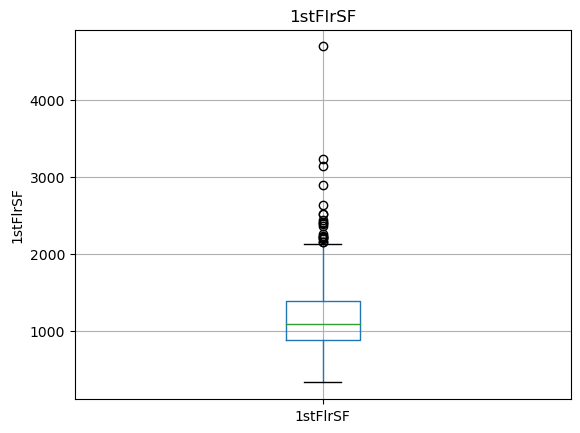

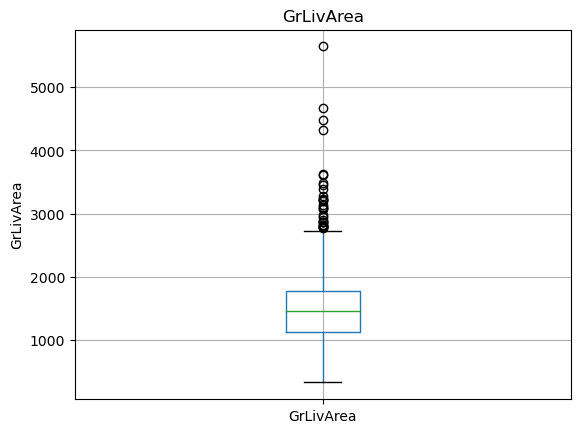

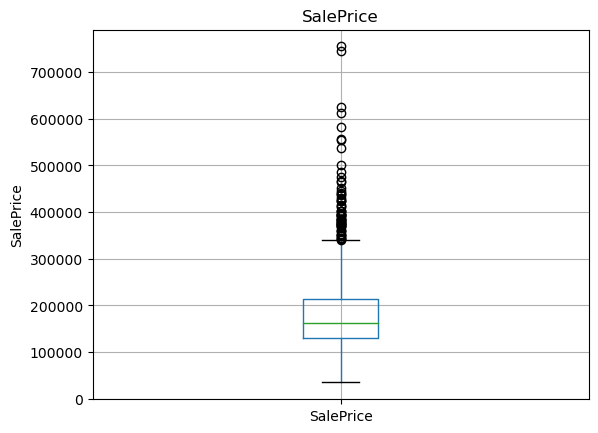

In [26]:
### Outliers
for feature in cont_features:
    df_copy=final_df.copy()
    if 0 in df_copy[feature].unique():
        pass
    else:
       # df_copy[feature]=np.log(df_copy[feature])
        df_copy.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Continuous Features like LotFrontageArea, LotArea, 1stFlrSF, GrLivArea, SalePrice shows many outliers. Let's handle them in further steps.

# Handling Categorical Features

In [27]:
cat_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [28]:
len(cat_features)

39

In [29]:
#Categorical features should undergo One Hot Encoding to standardize the dataset.
one_hot_encoded = pd.get_dummies(final_df[cat_features], drop_first=True)
final_df = pd.concat([final_df, one_hot_encoded], axis=1)
final_df.drop(cat_features, axis=1, inplace=True)


In [30]:
final_df.shape

(1460, 238)

In [31]:
final_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0     208500            0            0            1            0            1   
1     181500            0            0            1            0            1   
2     223500            0            0            1            0            1   
3     140000            0            0            1            0            1   
4     250000            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1           

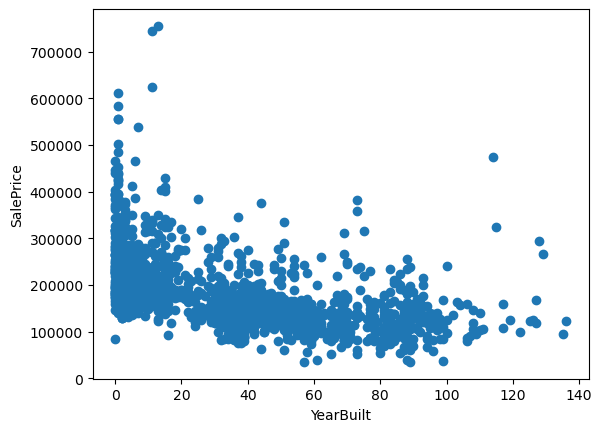

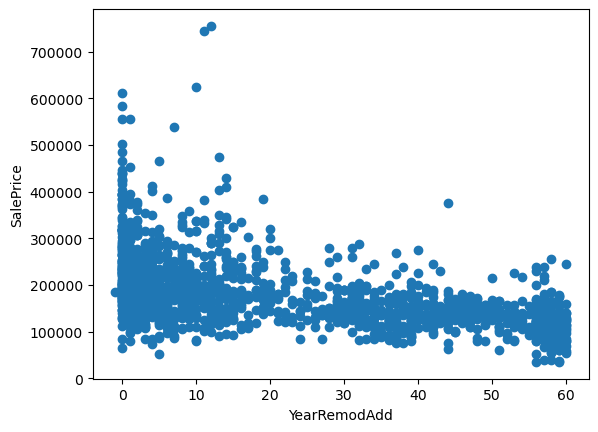

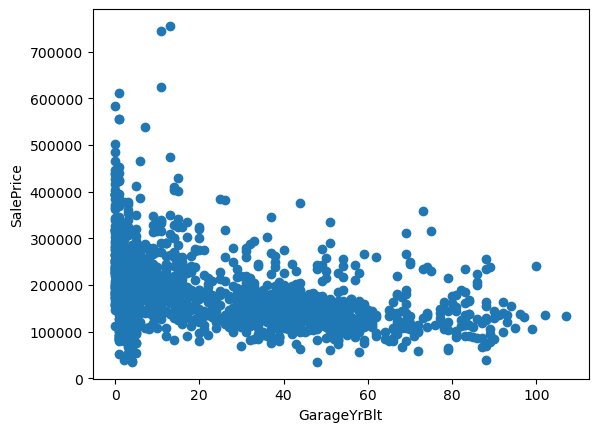

In [32]:
#Compare the difference between all years feature with YrSold.
year_feature=[feature for feature in final_df if 'Yr' in feature or 'Year' in feature]
data=final_df.copy()
for feature in year_feature:
    if feature!='YrSold':
        
        data[feature]=data['YrSold']-data[feature]
    
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
    

In [33]:
final_df=data.copy()

In [34]:
final_df.shape

(1460, 238)

In [35]:
#Applying Log to the Salesprice to bring downscale for better fit to the model.
df_copy=final_df
Y=np.log(final_df['SalePrice'])
X=final_df.drop(['SalePrice','Id'],axis=1)


# Handling null values in Test data

In [ ]:
percent_nan = percent_missing_data(df_test)
percent_nan

LotFrontage,GarageYrBlt,MasVnrArea,BsmtFinSF1,BsmtFinSF1=2,TotalBsmtSF,GarageArea

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:,1])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
index = percent_nan[percent_nan["missing_percent"] >70].index

for name in index:
    df_test.drop(name, axis=1,inplace=True)
print("Dropped Features in test data with >70% missing values:",index)

In [ ]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

MissingCat_Features=['FireplaceQu','GarageQual','GarageFinish','GarageCond','GarageType','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','MSZoning','BsmtHalfBath','Utilities','Functional','BsmtFullBath','BsmtUnfSF','KitchenQual','Exterior2nd','GarageCars','Exterior1st','SaleType']
for feature in MissingCat_Features:
    df_test[feature]=df_test[feature].fillna(df_test[feature].mode()[0])
    
percent_nan = percent_missing_data(df_test)
percent_nan

In [ ]:
final_test_df=df_test

In [ ]:

#1)Numerical features has Discrete features, continuous features, Year features
#2)Check each category seperately and handle them accordingly.
#3)Check for outliers, skewdness in distribution etc

numerical_features=[feature for feature in final_df.columns if final_df[feature].dtypes!='O']
len(numerical_features)
year_feature=[feature for feature in final_df if 'Yr' in feature or 'Year' in feature]

final_df[numerical_features] = final_df[numerical_features].fillna(final_df[numerical_features].mean())

Discrete_feature = [feature for feature in numerical_features if len(final_df[feature].unique())<25 and feature not in year_feature+['Id'] ]
print("No of Discrete variables: {}".format(len(Discrete_feature)))

for feature in Discrete_feature:
    df_copy=final_df.copy()
    df_copy.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

In [ ]:
#There is significant relation between discrete variables and Sales Price
#Continuous Numeric Variables
cont_features=[feature for feature in numerical_features if feature not in Discrete_feature+year_feature+['Id']]
print("No of Continuous Variables: {}".format(len(cont_features)))

In [ ]:
for feature in cont_features:
    df_copy=final_df.copy()
    df_copy[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

In [ ]:
#The above plots shows only few Gaussian distribution rest all are skewed.to convert the skewed ones to normal dist we implement Logarithmic Transformation
for feature in cont_features:
    df_copy=df_train.copy()
    if 0 in df_copy[feature].unique():
        pass
    else:
        df_copy[feature]=np.log(df_copy[feature])
        df_copy['SalePrice']=np.log(df_copy['SalePrice'])
        plt.scatter(df_copy[feature],df_copy['SalePrice'])
        
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()
    final_df['SalePrice']=df_train['SalePrice'].copy()

In [ ]:
### Outliers
for feature in cont_features:
    df_copy=final_df.copy()
    if 0 in df_copy[feature].unique():
        pass
    else:
       # df_copy[feature]=np.log(df_copy[feature])
        df_copy.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Handling Categorical Features

In [ ]:
cat_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
cat_features

In [ ]:
len(cat_features)

In [ ]:
#Categorical features should undergo One Hot Encoding to standardize the dataset.
one_hot_encoded = pd.get_dummies(final_df[cat_features], drop_first=True)
final_df = pd.concat([final_df, one_hot_encoded], axis=1)
final_df.drop(cat_features, axis=1, inplace=True)


In [ ]:
final_df.head()

In [ ]:
final_df.shape

In [ ]:
#Compare the difference between all years feature with YrSold.
year_feature=[feature for feature in final_df if 'Yr' in feature or 'Year' in feature]
data=final_df.copy()
for feature in year_feature:
    if feature!='YrSold':
        
        data[feature]=data['YrSold']-data[feature]
    
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [ ]:
final_df=data.copy()
final_df.shape

In [ ]:
#Applying Log to the Salesprice to bring downscale for better fit to the model.
df_copy=final_df
Y=np.log(final_df['SalePrice'])
X=final_df.drop(['SalePrice','Id'],axis=1)


## Train Test Split

In [38]:
#Split the train and test data to perform preprocessing and modelling activities.
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.20, random_state=34)


In [39]:
#Y_train.head()

# Decision Tree Classification

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
dt_regressor = DecisionTreeRegressor()

In [37]:
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [38]:
Y_pred = dt_regressor.predict(X_test)

In [39]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [40]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.05612660142443285
R-squared: 0.6834153916884125


# Feature Scaling

In [41]:
#Using minmax scalar to scale the data in the dataset to prepare for modelling.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [42]:
#scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

In [43]:
dt_regressor.fit(X_train_scaled,Y_train)

DecisionTreeRegressor()

In [44]:
Y_pred = dt_regressor.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.057656545600207144
R-squared: 0.6747856730642013


# Hyperparameter Tuning

In [45]:
# Define the hyperparameter grid

param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 4, 5,0.05,0.06, 0.04,0.07,0.03,0.01,0.1, 0.5],
    'max_features': ['auto','int','float', 'sqrt', 'log2'],
    'ccp_alpha':[0.0,0.1,0.2,0.3,0.4,0.5],
   #'max_depth': [None, 5, 10],
    #'min_samples_leaf': [1, 2]
}

In [46]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV,KFold
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv= KFold(n_splits=5, shuffle=True, random_state=42))


In [47]:
# Fit the model on the training data with grid search
grid_search.fit(X_train_scaled, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\harsh\a

Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_features': 'auto', 'min_samples_split': 0.06, 'splitter': 'best'}


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9240 fits failed out of a total of 13200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\base.py"

In [48]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.041988162394832794
R-squared: 0.7631638900604287


### Decision Tree plot

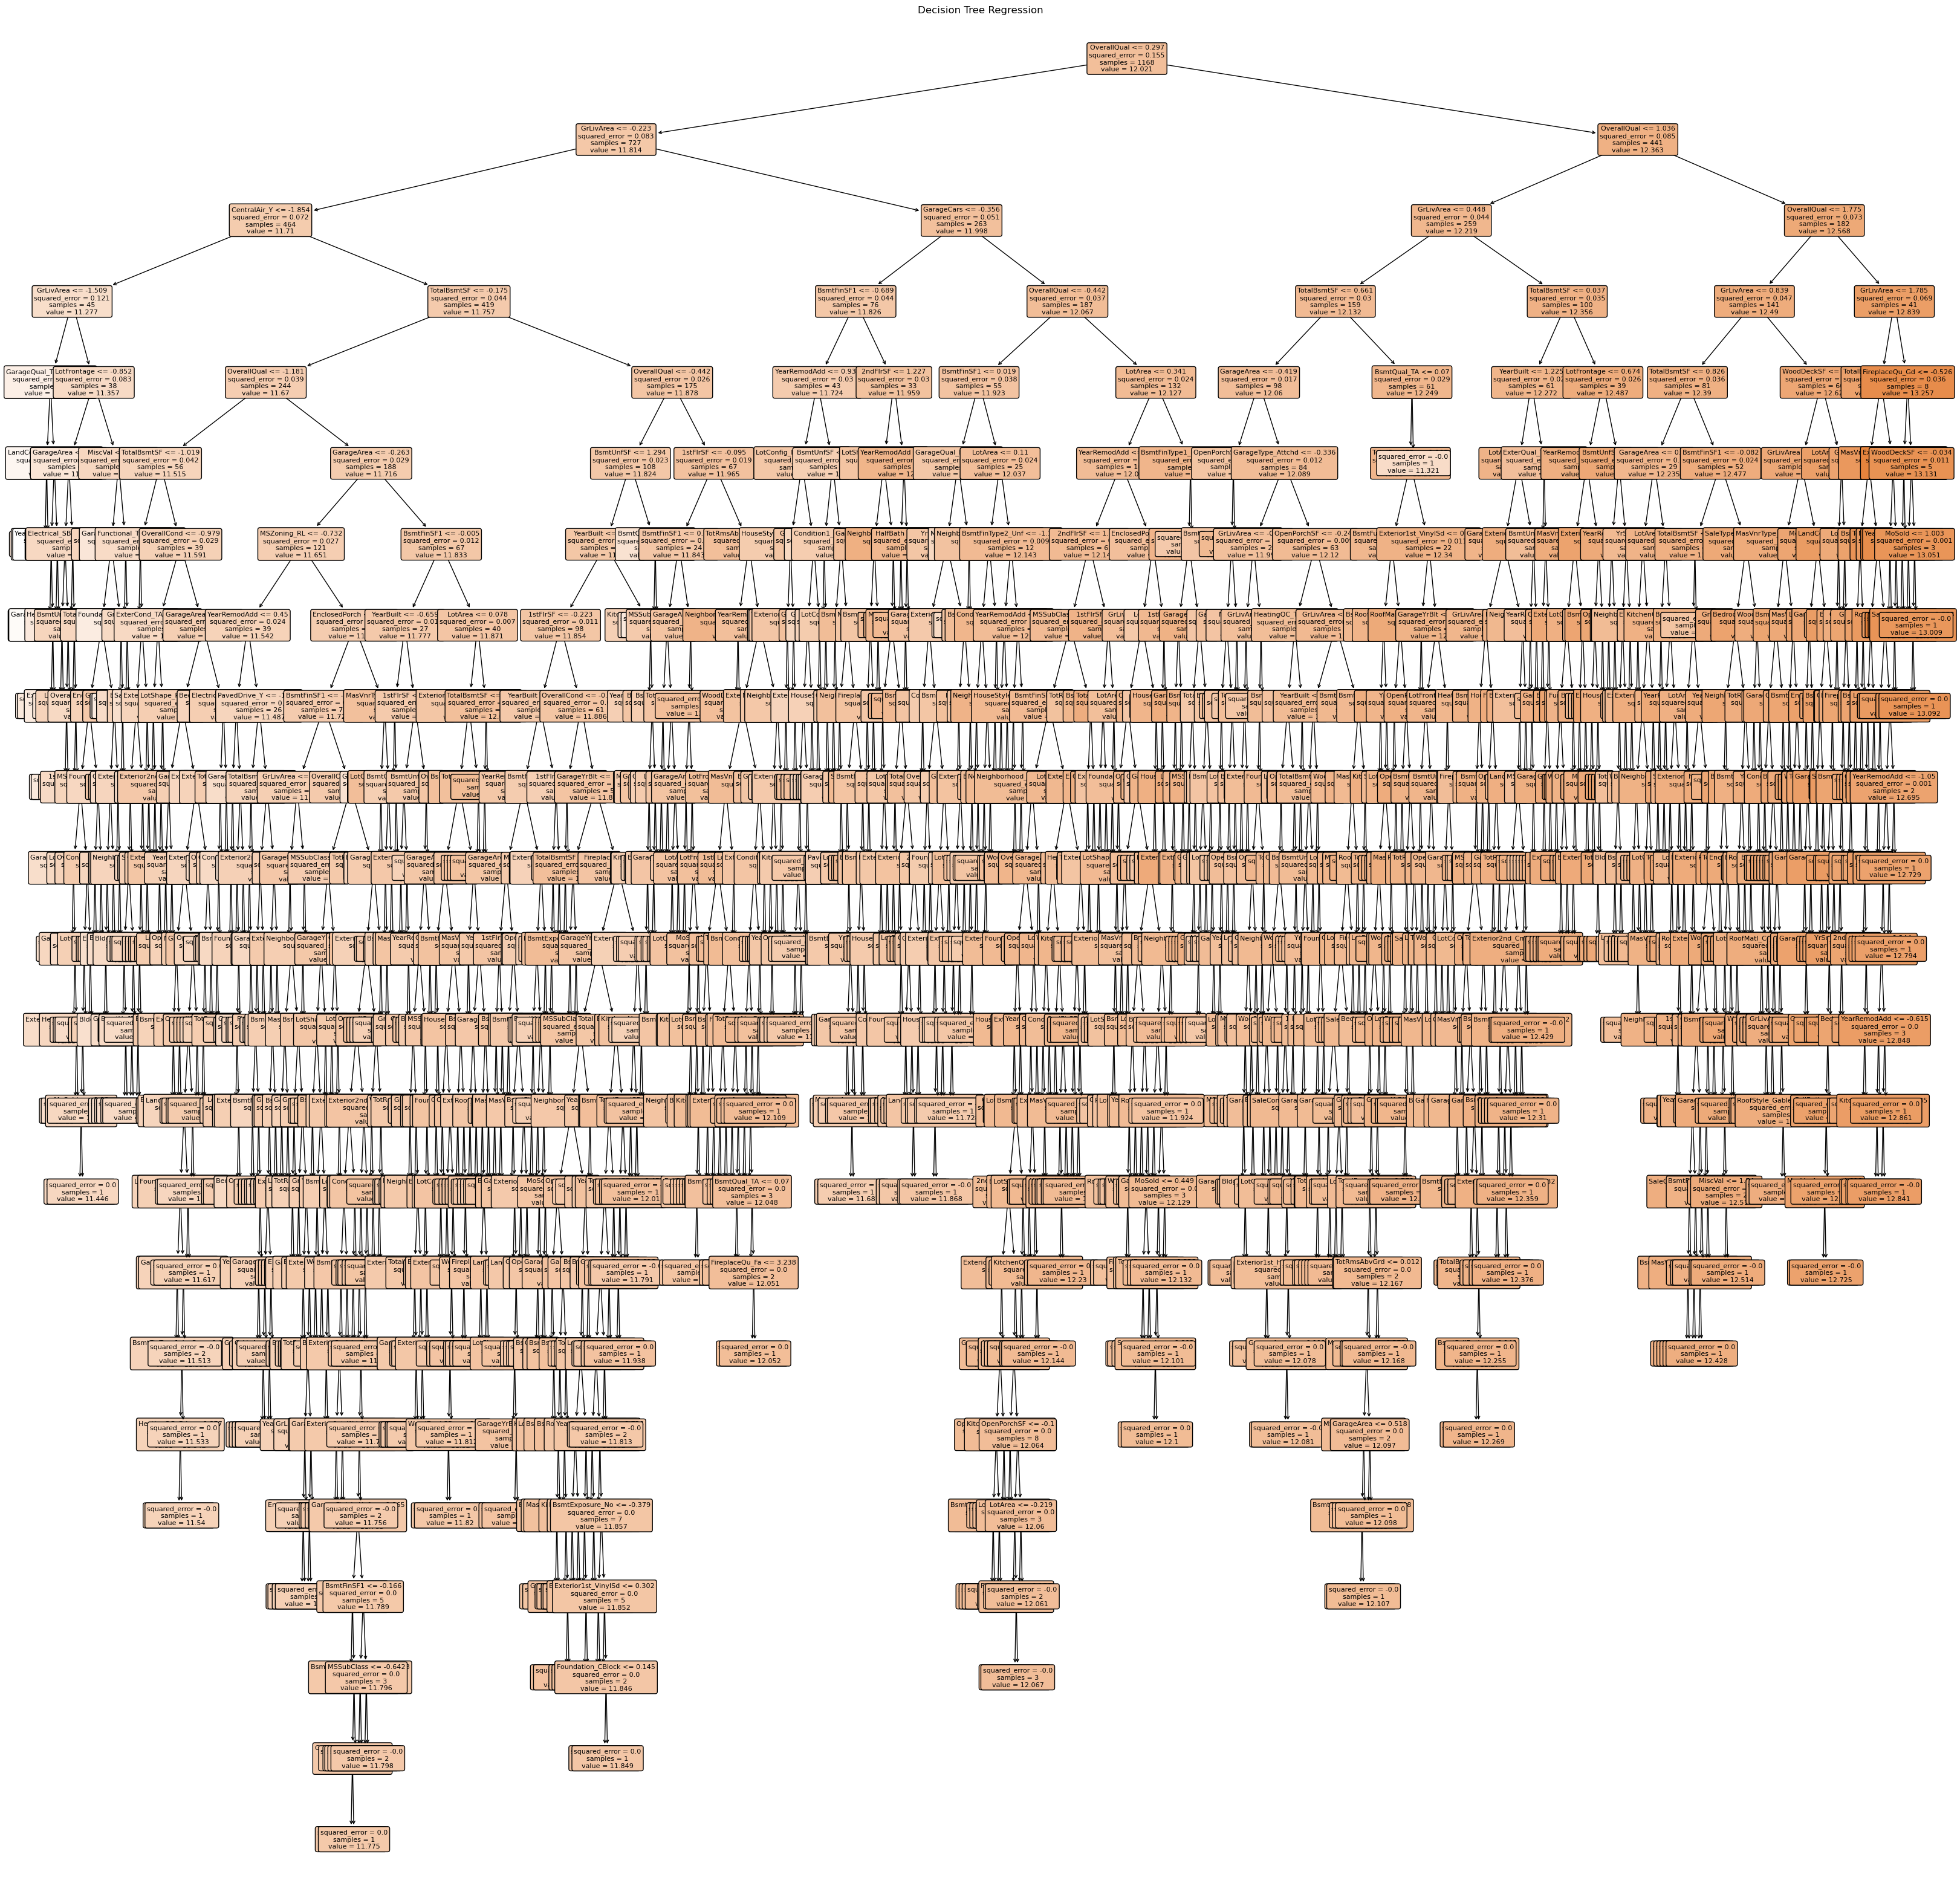

In [49]:
plt.figure(figsize=(40,40))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Regression")
plt.show()

## Feature Importances

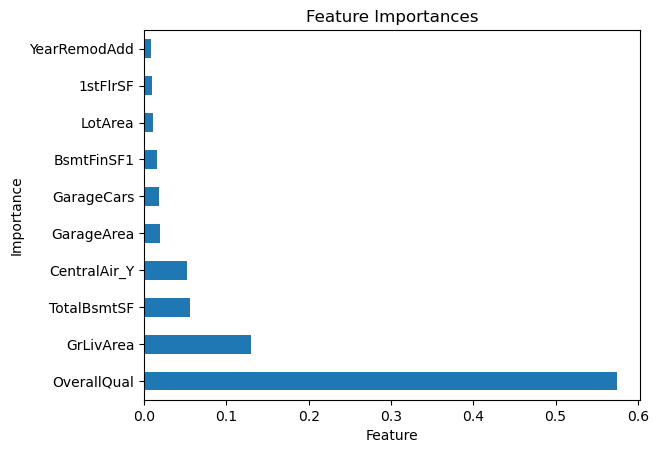

In [50]:
# Plot feature importances
feat_importances = pd.Series(dt_regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

The above graph shows the top 10 features with high importances filtered based on most relevance or dependancy with the output variable.

# RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model on the training data with grid search
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [53]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [55]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.026843869953164227
R-squared: 0.8485859496386643


# SVM

In [56]:
from sklearn.svm import SVR

In [57]:
# Initialize the Support Vector Machine Regressor
svm_regressor = SVR()  # You can choose different kernels (e.g., 'linear', 'rbf')

# Fit the model on the scaled training data
svm_regressor.fit(X_train, Y_train)

# Make predictions on the scaled test set
y_pred = svm_regressor.predict(X_test)


In [58]:
Y_test.describe()

count    292.000000
mean      12.034689
std        0.421778
min       10.976782
25%       11.754889
50%       11.970350
75%       12.278393
max       13.323927
Name: SalePrice, dtype: float64

In [59]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.043751346936604964
R-squared: 0.7532185687088496


### Plot predicted vs. actual prices

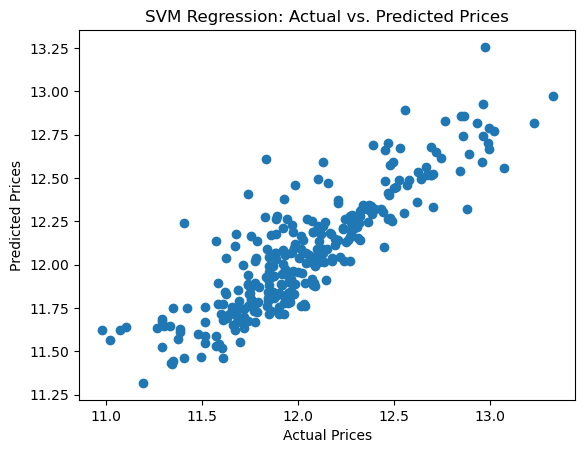

In [60]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVM Regression: Actual vs. Predicted Prices")
plt.show()

### Get the indices of the bottom 20% features

In [61]:
sorted_indices = feat_importances.argsort()
bottom_indices = sorted_indices.head(int(0.2 * len(sorted_indices)))

print(bottom_indices)

MSSubClass         117
LotFrontage         86
LotArea             85
OverallQual         84
OverallCond         82
YearBuilt           81
YearRemodAdd        80
MasVnrArea          77
BsmtFinSF1         153
BsmtFinSF2         158
BsmtUnfSF           74
TotalBsmtSF        159
1stFlrSF           160
2ndFlrSF            71
LowQualFinSF       163
GrLivArea           69
BsmtFullBath        68
BsmtHalfBath        67
FullBath            66
HalfBath           164
BedroomAbvGr        62
KitchenAbvGr        61
TotRmsAbvGrd       125
Fireplaces         174
GarageYrBlt        144
GarageCars          88
GarageArea          89
WoodDeckSF          90
OpenPorchSF        119
EnclosedPorch      126
3SsnPorch          234
ScreenPorch        115
PoolArea           114
MiscVal            113
MoSold             112
YrSold             111
MSZoning_FV        110
MSZoning_RH        108
MSZoning_RL        107
MSZoning_RM        175
Street_Pave        130
LotShape_IR2       131
LotShape_IR3       132
LotShape_Re

### Dropping least important features 

In [62]:
# Drop the bottom 20% features from the dataset
X_drop_bottom = X.drop(columns=X.columns[bottom_indices])

#Split the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_drop_bottom, Y, test_size=0.2, random_state=42)

# Continue with your modeling and analysis using the reduced feature set

In [63]:
X_train.shape

(1168, 189)

In [64]:
X.shape

(1460, 236)

## Hyperparameter Tuning of SVM

In [65]:
# Define the hyperparameters to tune
param_grid = {
    'C': [0.001,0.01,0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear','rbf'],  # Kernel choice
   # 'degree': [2, 3, 4],  # Polynomial degree (if 'poly' kernel is chosen)
}

# Perform GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(svm_regre ssor, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [66]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

Best Hyperparameters: {'C': 0.001, 'kernel': 'linear'}


In [67]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.023389071601546282
R-squared: 0.8746657164971481


# KNN Regressor

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
# Choose the value of k
k_value = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k_value)
knn_regressor.fit(X_train, Y_train)

KNeighborsRegressor()

In [98]:
y_pred = knn_regressor.predict(X_test)

In [99]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0481564825447144
R-squared: 0.7419453692484166


## Hyperparameter tuning of KNN

In [100]:
# Define the hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9,10, 11,13]}

# Perform GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(knn_regressor, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 10, 11, 13]},
             scoring='neg_mean_squared_error')

In [101]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

Best Hyperparameters: {'n_neighbors': 5}


In [102]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error on Test Set: 0.0481564825447144
R-squared: 0.7419453692484166


## Analysing the results from different models:

### R-squared(Best of before / after Hyperparameter Tuning):

Decision Tree: 0.7631638900604287    
SVM: 0.8767589316251019    
KNN: 0.7419453692484166    
Random Forest: 0.8485859496386643  

SVM model after Hyperparameter tuning proves best fit model after varying different paramteres ({'C': 0.001, 'kernel': 'linear'}).